<a href="https://colab.research.google.com/github/Ashu156/JLab/blob/main/JL_Body_weight_across_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import io

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Weights for plotting.csv']))
print(df)

Saving Weights for plotting.csv to Weights for plotting.csv
          XFN1        XFN2        XFN3        XFN4
0   100.000000  100.000000  100.000000  100.000000
1    96.857671   96.183206   95.866142   97.064220
2    94.085028   93.129771   94.685039   95.229358
3    92.421442   92.748092   93.897638   94.495413
4    92.236599   91.984733   92.519685   93.761468
5          NaN         NaN         NaN         NaN
6          NaN         NaN         NaN         NaN
7    88.170055   87.213740   89.173228   89.724771
8    88.354898   87.213740   89.370079   89.357798
9    89.463956   87.595420   89.566929   89.908257
10   88.724584   88.358779   88.779528   90.091743
11   88.354898   87.404580   88.779528   89.724771
12         NaN         NaN         NaN         NaN
13         NaN         NaN         NaN         NaN
14   83.364140   83.778626   86.220472   85.137615
15   83.364140   83.587786   85.039370   84.954128
16   86.691312   86.450382   87.795276   87.706422


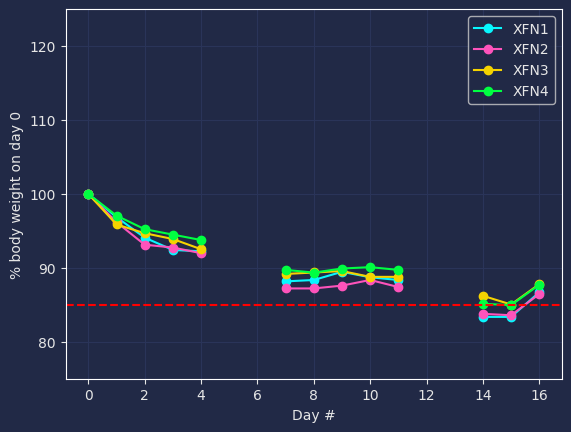

In [3]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41',  # matrix green
]
fig, ax = plt.subplots()
# df.plot(x = 'Food fed', y = ['XFN1', 'XFN2', 'XFN3',  'XFN4'], marker='o', color=colors, ax=ax)
df.plot(marker='o', color=colors, ax=ax)
ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([75, 125])
ax.set_xlabel('Day #')
ax.set_ylabel('% body weight on day 0'),
# ax.set_xticklabels(['0', '1', '2'])
ax.axhline(85.0, linestyle='--', color = 'red')